## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Student name: Jane Grigorenko
# Student pace: part time
# Scheduled project review date/time: 
# Instructor name: Rajive Islam
# Blog post URL: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [3]:
# load movies titles

df_titles = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')


In [4]:
# load movies gross

df_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip',thousands=',')

In [5]:
# load movies ratings

df_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')

In [6]:
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip',thousands=',')

In [7]:
# look at the data structure - rows and columns
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# look at the data structure - rows and columns
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [9]:
# look at the data structure - rows and columns
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
# removing all films older than 2010

df_title_filt = (df_titles["start_year"] >= 2010)
df_titles = df_titles.loc[df_title_filt]

In [11]:
# calculating median for length of the movies with NaN 

df_titles['runtime_minutes'].median()

87.0

In [12]:
# in order to keep movies with the NaN value in runtime_minutes I decided to replace NaN values with the median calculated above

df_titles['runtime_minutes'] = df_titles['runtime_minutes'].fillna(df_titles['runtime_minutes'].median())

In [13]:
# data cleaaned to the level we desire. One item missed for the primary title, will replace will missing as we all original titles missing will be replaced with missing
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [14]:
# identifying how many NaN is in the genres column

df_titles['genres'].isna().sum()

5408

In [15]:
# continue cleaning data by repacing NaN in genres with "Missing"

df_titles['genres'] = df_titles['genres'].fillna('Missing')

In [16]:
# continue cleaning data by repacing NaN in primary title with "Missing"
df_titles['primary_title'] = df_titles['primary_title'].fillna('Missing')

In [17]:
# continue cleaning data by repacing NaN in original title with "Missing"
df_titles['original_title'] = df_titles['original_title'].fillna('Missing')

In [18]:
# Data cleaned
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [19]:
# Removing rating for those movies where number of votes is less than 50

df_ratings_filt = (df_ratings["numvotes"] >= 50)
df_ratings = df_ratings.loc[df_ratings_filt]

In [20]:
# Number of entries have been decreased. All rows are filled, Data cleaned
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36824 entries, 1 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         36824 non-null  object 
 1   averagerating  36824 non-null  float64
 2   numvotes       36824 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [21]:
# combined two data frames df_title and df_rating to get one dataset called df_title_rating. 

df_title_rating = df_titles.merge(df_ratings, left_on='tconst', right_on='tconst')
df_title_rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36824 entries, 0 to 36823
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           36824 non-null  object 
 1   primary_title    36824 non-null  object 
 2   original_title   36824 non-null  object 
 3   start_year       36824 non-null  int64  
 4   runtime_minutes  36824 non-null  float64
 5   genres           36824 non-null  object 
 6   averagerating    36824 non-null  float64
 7   numvotes         36824 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


In [22]:
df_title_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
3,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
4,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451


In [23]:
# How many missing genres are there

(df_title_rating['genres'] == 'Missing').value_counts()

genres
False    36751
True        73
Name: count, dtype: int64

In [24]:
# setting up a date type for the date column in a new df

df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])

In [25]:
df_budget['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [26]:
# extracting the year part form the date and creaing a new column

df_budget ['Year'] = df_budget['release_date'].dt.strftime('%Y')

In [27]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [28]:
# Changing the type for Year to integer
df_budget = df_budget.astype({"Year": object, "Year": int})

In [29]:
# Filtering on the movies release year from 2010 omwards
df_year_filt = (df_budget["Year"] >= 2010)
df_budget = df_budget.loc[df_year_filt]

In [30]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015


In [31]:
# Making all columns titles lower case
df_budget.columns = [x.lower() for x in df_budget.columns]

In [32]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015


In [33]:
# Renaming column name mivie to title

df_budget.rename(columns = {'movie' : 'title'}, inplace = True)

In [34]:
df_budget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015


In [35]:
# the numberical data did include dollar signes $ and "," . Clearing the data with the lambda function to get the whole number

df_budget['production_budget'] = df_budget['production_budget'].apply(lambda x: float(''.join(filter(str.isdigit, x))) if not x.isnumeric() else float(x))

In [36]:
# the numberical data did include dollar signes $ and "," . Clearing the data with the lambda function to get the whole number
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(lambda x: float(''.join(filter(str.isdigit, x))) if not x.isnumeric() else float(x))

In [37]:
# the numberical data did include dollar signes $ and "," . Clearing the data with the lambda function to get the whole number
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(lambda x: float(''.join(filter(str.isdigit, x))) if not x.isnumeric() else float(x))

In [38]:
# Creating a new column profit_gross which is a difference between worldwide gross and production budget
df_budget['profit_gross'] = df_budget['worldwide_gross'] - df_budget['production_budget']

In [39]:
df_budget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,9.997217e+08
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09


In [40]:
df_title_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
3,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
4,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451


In [41]:
# Merging teo data frames
df_budget_merged = df_budget.merge(df_title_rating, left_on=['title', 'year'], right_on=['primary_title','start_year'])

In [42]:
df_budget_merged.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135


In [43]:
# Dropping some of the columns
df_budget_merged.drop(['start_year', 'primary_title', 'original_title', 'id'], axis='columns', inplace=True)

In [44]:
df_budget_merged.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,runtime_minutes,genres,averagerating,numvotes
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135


In [45]:
# Optional to remove unprofitable shws from the data frame or to leave them, doesn't chnage the results
# df_profit_filt = (df_budget_merged["profit_gross"] > 0)
# df_budget_merged = df_budget_merged.loc[df_profit_filt]

In [46]:
# Grouping profit by genres

budget_genres = df_budget_merged.groupby(["genres"])["profit_gross"].sum()

In [47]:
budget_genres

genres
Action                        7.018988e+06
Action,Adventure             -4.488226e+06
Action,Adventure,Animation    5.393483e+09
Action,Adventure,Biography    5.668259e+08
Action,Adventure,Comedy       6.653515e+09
                                  ...     
Romance                      -1.250000e+05
Romance,Sci-Fi,Thriller       7.673132e+07
Sci-Fi,Thriller              -1.600670e+07
Thriller                      6.601789e+06
Western                      -1.000000e+06
Name: profit_gross, Length: 223, dtype: float64

Text(0.5, 1.0, 'Profit by Genres')

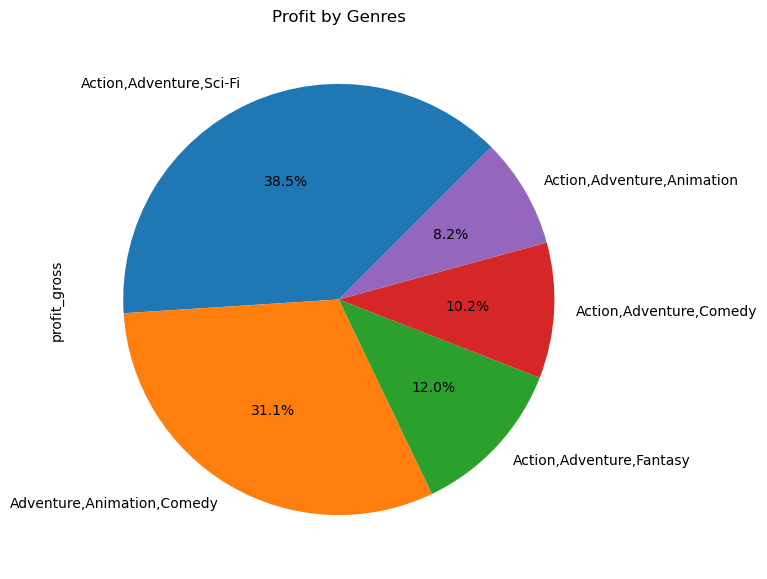

In [48]:
# Building a pie plot for the profit by genres
budget_genres.sort_values(ascending = False).head(5).plot.pie(figsize=(8, 7),autopct='%1.1f%%', startangle=45)
plt.title('Profit by Genres')

In [49]:
# Assigning the sort by to a nee data frame

df_pie1 = budget_genres.sort_values(ascending = False).head(5)
df_pie1

genres
Action,Adventure,Sci-Fi       2.520243e+10
Adventure,Animation,Comedy    2.034746e+10
Action,Adventure,Fantasy      7.840060e+09
Action,Adventure,Comedy       6.653515e+09
Action,Adventure,Animation    5.393483e+09
Name: profit_gross, dtype: float64

In [50]:
df_budget_merged.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,runtime_minutes,genres,averagerating,numvotes
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135


In [51]:
# Creating a list of genres by splitting on commas
df_budget_merged['genres_split'] = df_budget_merged['genres'].str.split(',')

In [52]:
# Calculating the proportional gross profit for each genre component
df_budget_merged['profit_split'] = df_budget_merged ['profit_gross'] / df_budget_merged['genres_split'].str.len()

In [53]:
df_budget_merged.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,runtime_minutes,genres,averagerating,numvotes,genres_split,profit_split
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,"[Action, Adventure, Fantasy]",2.116880e+08
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451,"[Action, Adventure, Sci-Fi]",-6.674588e+07
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594,"[Action, Adventure, Sci-Fi]",3.574713e+08
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"[Action, Adventure, Sci-Fi]",5.827114e+08
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135,"[Action, Adventure, Fantasy]",1.186484e+08


In [54]:
# Creating a new row for each genre component in the genres_split list
df_genres = df_budget_merged.explode('genres_split')


In [55]:
df_genres

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,runtime_minutes,genres,averagerating,numvotes,genres_split,profit_split
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,635063875.0,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,Action,2.116880e+08
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,635063875.0,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,Adventure,2.116880e+08
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,635063875.0,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,Fantasy,2.116880e+08
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-200237650.0,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451,Action,-6.674588e+07
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-200237650.0,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451,Adventure,-6.674588e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2015-12-01,Dutch Kills,25000.0,0.0,0.000000e+00,2015,-25000.0,tt2759066,90.0,"Crime,Drama,Thriller",5.1,82,Thriller,-8.333333e+03
1458,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,2011,-17300.0,tt1781935,89.0,"Drama,Horror,Thriller",2.9,127,Drama,-5.766667e+03
1458,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,2011,-17300.0,tt1781935,89.0,"Drama,Horror,Thriller",2.9,127,Horror,-5.766667e+03
1458,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,2011,-17300.0,tt1781935,89.0,"Drama,Horror,Thriller",2.9,127,Thriller,-5.766667e+03


In [56]:
# Renaming columns
df_genres.rename(columns = {'profit_gross' : 'profit_combined', 'profit_split' : 'profit_individual'}, inplace = True)

In [57]:
df_genres.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_combined,tconst,runtime_minutes,genres,averagerating,numvotes,genres_split,profit_individual
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,635063875.0,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,Action,2.116880e+08
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,635063875.0,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,Adventure,2.116880e+08
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,635063875.0,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,Fantasy,2.116880e+08
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-200237650.0,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451,Action,-6.674588e+07
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-200237650.0,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451,Adventure,-6.674588e+07


In [58]:
# Groupping profit by genres for combined genres
budget_genres2 = df_genres.groupby(["genres"])["profit_combined"].sum()
budget_genres2

genres
Action                        7.018988e+06
Action,Adventure             -8.976452e+06
Action,Adventure,Animation    1.618045e+10
Action,Adventure,Biography    1.700478e+09
Action,Adventure,Comedy       1.996055e+10
                                  ...     
Romance                      -1.250000e+05
Romance,Sci-Fi,Thriller       2.301940e+08
Sci-Fi,Thriller              -3.201340e+07
Thriller                      6.601789e+06
Western                      -1.000000e+06
Name: profit_combined, Length: 223, dtype: float64

In [59]:
# Looking at the top 10
budget_genres2.sort_values(ascending = False).head(10)

genres
Action,Adventure,Sci-Fi       7.560730e+10
Adventure,Animation,Comedy    6.104239e+10
Action,Adventure,Fantasy      2.352018e+10
Action,Adventure,Comedy       1.996055e+10
Action,Adventure,Animation    1.618045e+10
Adventure,Family,Fantasy      1.160100e+10
Action,Crime,Thriller         1.030472e+10
Horror,Mystery,Thriller       8.889189e+09
Action,Adventure,Thriller     8.775346e+09
Action,Adventure,Drama        7.484772e+09
Name: profit_combined, dtype: float64

Text(0.5, 1.0, 'Profit by Genres')

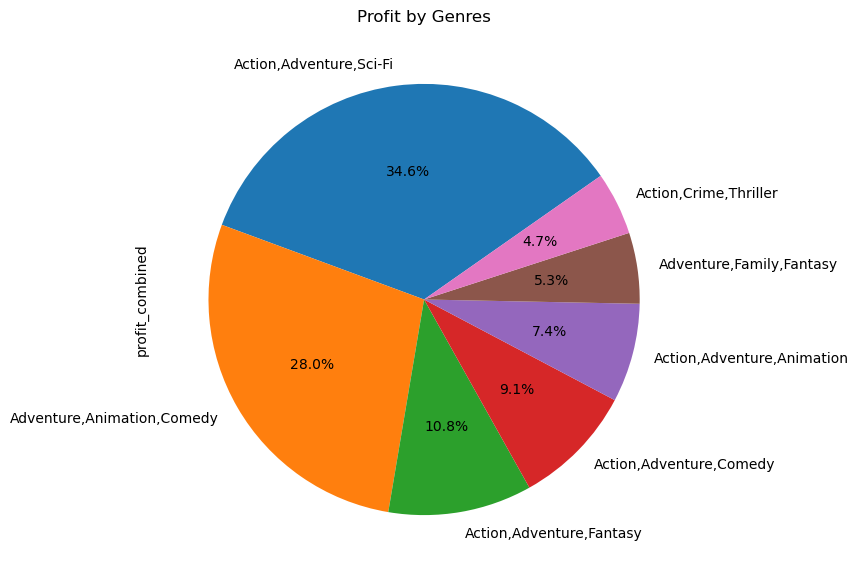

In [60]:
# Building a pie chart for 7 top combined genres for profit by genres
budget_genres2.sort_values(ascending = False).head(7).plot.pie(figsize=(9, 7),autopct='%1.1f%%', startangle=35)
plt.title('Profit by Genres')

In [61]:
# Assinging to the new data frame
df_pie3 = budget_genres2.sort_values(ascending = False).head(7)
df_pie3

genres
Action,Adventure,Sci-Fi       7.560730e+10
Adventure,Animation,Comedy    6.104239e+10
Action,Adventure,Fantasy      2.352018e+10
Action,Adventure,Comedy       1.996055e+10
Action,Adventure,Animation    1.618045e+10
Adventure,Family,Fantasy      1.160100e+10
Action,Crime,Thriller         1.030472e+10
Name: profit_combined, dtype: float64

In [62]:
# Groupping profit for individual genres for genres_split
df_genre_count_profit = df_genres.groupby(["genres_split"])["profit_individual"].sum()

In [63]:
# Displaying results
df_genre_count_profit


genres_split
Action         2.438180e+10
Adventure      2.889602e+10
Animation      9.402346e+09
Biography      2.568429e+09
Comedy         1.875525e+10
Crime          3.981730e+09
Documentary    1.596213e+08
Drama          1.268515e+10
Family         4.101048e+09
Fantasy        6.507714e+09
History        6.799188e+08
Horror         3.470791e+09
Music          1.025740e+09
Musical        4.842584e+08
Mystery        2.883299e+09
Romance        3.525883e+09
Sci-Fi         1.116116e+10
Sport          3.749631e+08
Thriller       7.849484e+09
War            1.767764e+08
Western        2.199049e+08
Name: profit_individual, dtype: float64

Text(0.5, 1.0, 'Profit by Genres')

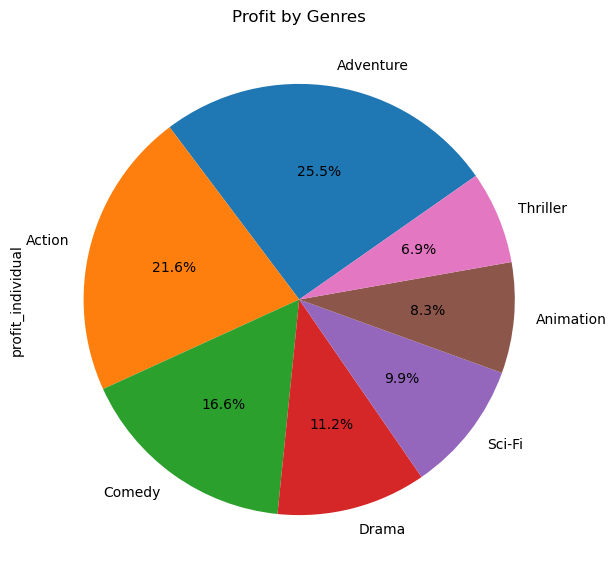

In [64]:
# Building a pie chart for 7 top individual genres for profit by genres

df_genre_count_profit.sort_values(ascending = False).head(7).plot.pie(figsize=(8, 7),autopct='%1.1f%%', startangle=35)

plt.title('Profit by Genres')

In [65]:
# Assinging the plot to the new data frame
df_pie2 = df_genre_count_profit.sort_values(ascending = False).head(7)


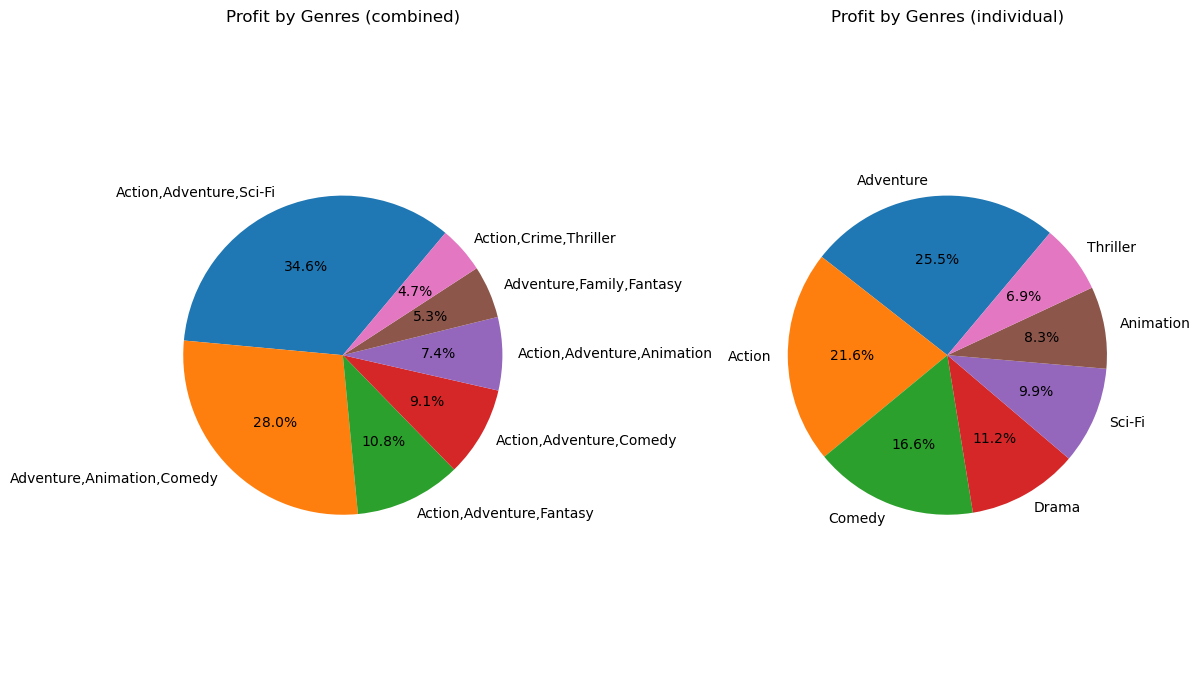

In [66]:
# Creating a subplot for bith profit by combined genres and individual genres

fig, axes = plt.subplots(1, 2, figsize=(12, 7))


df_pie3.plot.pie(autopct='%1.1f%%', startangle=50,ax=axes[0])
axes[0].set_title('Profit by Genres (combined)')
axes[0].set_xlabel('')
axes[0].set_ylabel('')


df_pie2.plot.pie(autopct='%1.1f%%', startangle=50,ax=axes[1])
axes[1].set_title('Profit by Genres (individual)')
axes[1].set_xlabel('')
axes[1].set_ylabel('')


axes[0].axis('equal')
axes[1].axis('equal')


plt.tight_layout()


plt.show()

fig.savefig('images/fig_profit.png', transparent=True)

In [67]:
df_budget_merged.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,runtime_minutes,genres,averagerating,numvotes,genres_split,profit_split
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,"[Action, Adventure, Fantasy]",2.116880e+08
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451,"[Action, Adventure, Sci-Fi]",-6.674588e+07
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594,"[Action, Adventure, Sci-Fi]",3.574713e+08
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"[Action, Adventure, Sci-Fi]",5.827114e+08
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135,"[Action, Adventure, Fantasy]",1.186484e+08


In [68]:
filt1 = df_budget_merged['genres'].str.contains('Family,Fantasy,Musical',na=False)

In [69]:
df_budget_merged.loc[filt1]

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,runtime_minutes,genres,averagerating,numvotes,genres_split,profit_split
93,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,2017,1.099200e+09,tt2771200,129.0,"Family,Fantasy,Musical",7.2,238325,"[Family, Fantasy, Musical]",366399902.0


In [70]:
# Calculated mean and median for both profit_gross and average rating
df_profit_rating_grouped = df_budget_merged.groupby('genres').agg({'profit_gross': ['mean', 'median'], 'averagerating': ['mean', 'median']})


df_profit_rating_grouped.columns = ['profit_gross_mean', 'profit_gross_median', 'averagerating_mean', 'averagerating_median']

df_profit_rating_grouped = df_profit_rating_grouped.sort_values(by='profit_gross_mean', ascending=False)
df_profit_rating_grouped

,profit_gross_mean,profit_gross_median,averagerating_mean,averagerating_median
genres,,,,
"Family,Fantasy,Musical",1.099200e+09,1.099200e+09,7.200000,7.20
"Adventure,Drama,Sci-Fi",5.243254e+08,5.243254e+08,8.300000,8.30
"Action,Adventure,Sci-Fi",4.846622e+08,3.774847e+08,6.767308,6.95
"Adventure,Fantasy",4.695440e+08,6.955776e+08,7.166667,7.40
"Drama,Family,Fantasy",4.395514e+08,4.395514e+08,6.900000,6.90
...,...,...,...,...
"Comedy,Horror,Sci-Fi",-3.292904e+07,-3.292904e+07,5.900000,5.90
"Action,Fantasy,Western",-3.348568e+07,-3.348568e+07,6.300000,6.30
"Crime,Drama,History",-4.199578e+07,-4.199578e+07,6.500000,6.50


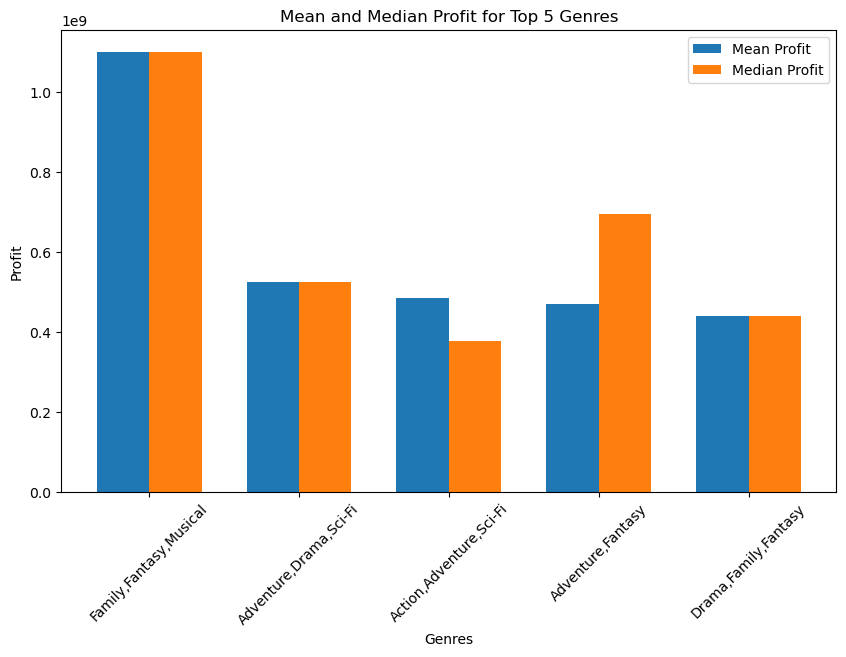

In [71]:
# built a bar chart comparing mean and median for both profit_gross and average rating. Didn't find the chart usefull because of low sample sized within the genre categories

top_genres_mean = df_profit_rating_grouped.sort_values(by='profit_gross_mean', ascending=False).head(5)


bar_width = 0.35


indices = np.arange(len(top_genres_mean))

# Plot the bar chart for profit mean and median side by side
plt.figure(figsize=(10, 6))
plt.bar(indices - bar_width/2, top_genres_mean['profit_gross_mean'], bar_width, label='Mean Profit')
plt.bar(indices + bar_width/2, top_genres_mean['profit_gross_median'], bar_width, label='Median Profit')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Mean and Median Profit for Top 5 Genres')
plt.xticks(indices, top_genres_mean.index, rotation=45)
plt.legend()

# Show the plot
plt.show()

In [72]:
df_budget_merged.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross,tconst,runtime_minutes,genres,averagerating,numvotes,genres_split,profit_split
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624,"[Action, Adventure, Fantasy]",2.116880e+08
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451,"[Action, Adventure, Sci-Fi]",-6.674588e+07
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594,"[Action, Adventure, Sci-Fi]",3.574713e+08
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"[Action, Adventure, Sci-Fi]",5.827114e+08
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135,"[Action, Adventure, Fantasy]",1.186484e+08


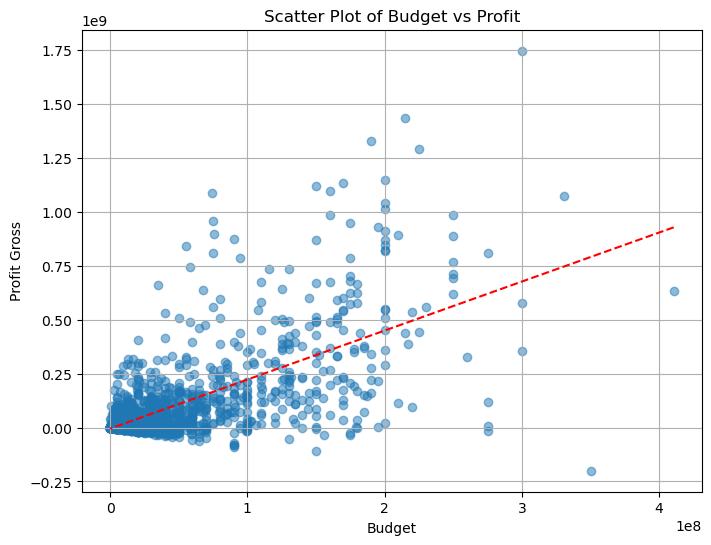

In [73]:
# Correlation between product budget and and profit: There is a reasonable correlation between production budget and profit. we can use this data to seek the higher budget from the producers here is a reasonable correlation between production budget and profit. we can use this data to seek the higher budget from the producers

# Seek a higher budgets from the producers
plt.figure(figsize=(8, 6))
plt.scatter(df_budget_merged['production_budget'], df_budget_merged['profit_gross'], alpha=0.5)


z = np.polyfit(df_budget_merged['production_budget'], df_budget_merged['profit_gross'], 1)
p = np.poly1d(z)
plt.plot(df_budget_merged['production_budget'], p(df_budget_merged['production_budget']), "r--")

plt.title('Scatter Plot of Budget vs Profit')
plt.xlabel('Budget')
plt.ylabel('Profit Gross')
plt.grid(True)
plt.savefig('images/fig_scatter_budget_vs_profit.png', transparent=True)
plt.show()


In [74]:
# Calculate correlation coefficient
correlation = df_budget_merged['production_budget'].corr(df_budget_merged['profit_gross'])
correlation


0.6601710565566606

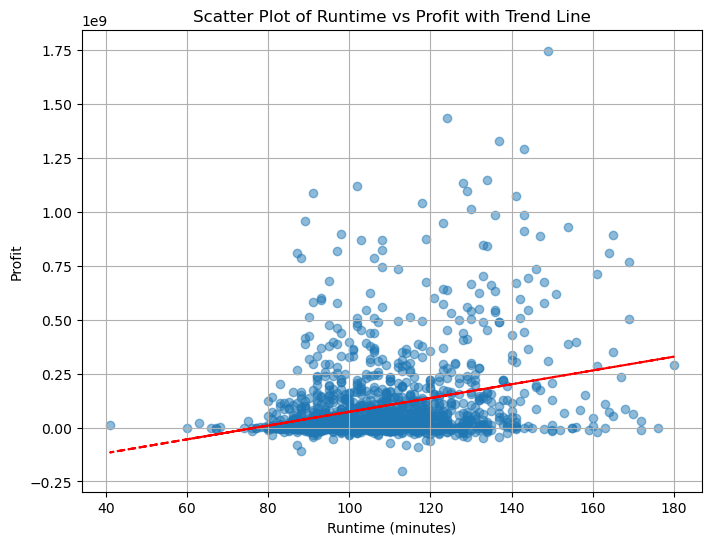

In [86]:
# Correlation between runtime and and profit: there is a weak correlation. Look at the mean and median runtime for the top three profit making genres further


plt.figure(figsize=(8, 6))
plt.scatter(df_budget_merged['runtime_minutes'], df_budget_merged['profit_gross'], alpha=0.5)

# Calculate trend line
z = np.polyfit(df_budget_merged['runtime_minutes'], df_budget_merged['profit_gross'], 1)
p = np.poly1d(z)
plt.plot(df_budget_merged['runtime_minutes'], p(df_budget_merged['runtime_minutes']), "r--")

plt.title('Scatter Plot of Runtime vs Profit with Trend Line')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [87]:
# Calculate correlation coefficient
correlation = df_budget_merged['runtime_minutes'].corr(df_budget_merged['profit_gross'])
correlation

0.2904295095499606

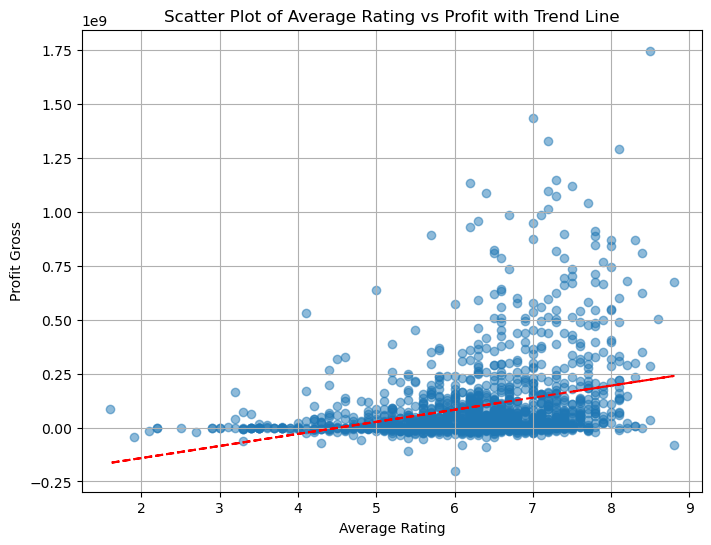

In [88]:
# Correclation between average rating and and profit: there is a weak correlation, we should not necesseraly try and make a critically acclimed film but rather concetrate on generating profit$$$$$$$$$$$$$
# Don
plt.figure(figsize=(8, 6))
plt.scatter(df_budget_merged['averagerating'], df_budget_merged['profit_gross'], alpha=0.5)

# Calculate trend line
z = np.polyfit(df_budget_merged['averagerating'], df_budget_merged['profit_gross'], 1)
p = np.poly1d(z)
plt.plot(df_budget_merged['averagerating'], p(df_budget_merged['averagerating']), "r--")

plt.title('Scatter Plot of Average Rating vs Profit with Trend Line')
plt.xlabel('Average Rating')
plt.ylabel('Profit Gross')
plt.grid(True)
plt.savefig('images/fig_scatter_rating_vs_profit.png', transparent=True)
plt.show()

In [78]:
# Calculate correlation coefficient
correlation = df_budget_merged['averagerating'].corr(df_budget_merged['profit_gross'])
correlation

0.3085090645949158

In [79]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3745 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       3745 non-null   datetime64[ns]
 1   title              3745 non-null   object        
 2   production_budget  3745 non-null   float64       
 3   domestic_gross     3745 non-null   float64       
 4   worldwide_gross    3745 non-null   float64       
 5   year               3745 non-null   int32         
 6   profit_combined    3745 non-null   float64       
 7   tconst             3745 non-null   object        
 8   runtime_minutes    3745 non-null   float64       
 9   genres             3745 non-null   object        
 10  averagerating      3745 non-null   float64       
 11  numvotes           3745 non-null   int64         
 12  genres_split       3745 non-null   object        
 13  profit_individual  3745 non-null   float64       
dtypes: datetime64

In [80]:
# Looking for runtime mean and median for the top three profitable genres
genres_to_search = ["Action,Adventure,Sci-Fi", "Adventure,Animation,Comedy", "Action,Adventure,Fantasy"]
filtered_df = df_genres[df_genres['genres'].isin(genres_to_search)]

summary_stats = filtered_df.groupby('genres')['runtime_minutes'].agg(['median', 'mean']).round(2)
summary_stats

,median,mean
genres,,
"Action,Adventure,Fantasy",118.0,117.94
"Action,Adventure,Sci-Fi",130.5,129.46
"Adventure,Animation,Comedy",93.0,93.96


In [81]:
# Overall mean for top three genres
overall_mean = filtered_df['runtime_minutes'].mean()
overall_mean

111.22

In [82]:
# Overall median for top three genres
overall_media = filtered_df['runtime_minutes'].median()
overall_media

107.0

In [85]:
df_budget

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,9.997217e+08
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,2014,-1.500000e+04
5771,72,2015-05-19,Family Motocross,10000.0,0.0,0.000000e+00,2015,-1.000000e+04
5772,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,2012,-4.416000e+03
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,-7.000000e+03
